# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
set_number = 1
record_number = 1
# city_weather_df

print("Beginning Data Retrieval")     
print("-----------------------------")

city_weather_df = pd.DataFrame({
    "City":cities, 
    "Lat":"",
    "Lng":"",
    "Max Temp":"",
    "Humidity":"",
    "Cloudiness":"",
    "Wind Speed":"",
    "Country":"",
    "Date":""
})
city_weather_df

base_url = "https://api.openweathermap.org/data/2.5/weather"
params = {"appid": weather_api_key,
          "units":"imperial"}

for index, row in city_weather_df.iterrows():
    try: 
        city = row ["City"]
        params ["q"] = city
        print(f"Processing Record {record_number} of Set {set_number} | {city}")
        city_weather_data = requests.get(base_url, params = params).json()
        
        city_weather_df.loc[index, "Lng"] = city_weather_data["coord"]["lon"]
        city_weather_df.loc[index, "Lat"] = city_weather_data["coord"]["lat"]
        city_weather_df.loc[index, "Max Temp"] = city_weather_data["main"]["temp_max"]
        city_weather_df.loc[index, "Humidity"] = city_weather_data["main"]["humidity"]
        city_weather_df.loc[index, "Cloudiness"] = city_weather_data["clouds"]["all"]
        city_weather_df.loc[index, "Wind Speed"] = city_weather_data["wind"]["speed"]
        city_weather_df.loc[index, "Country"] = city_weather_data["sys"]["country"]
        city_weather_df.loc[index, "Date"] = city_weather_data["dt"]
    except: 
        print("City not found. Skipping...")
    record_number = record_number + 1
    if record_number == 51: 
        record_number = 1
        set_number = set_number + 1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | halalo
City not found. Skipping...
Processing Record 3 of Set 1 | nanga eboko
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | vanavara
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | husavik
Processing Record 8 of Set 1 | chuy
Processing Record 9 of Set 1 | aginskoye
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | berlevag
Processing Record 14 of Set 1 | half moon bay
Processing Record 15 of Set 1 | umm kaddadah
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | santomera
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | asau
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | 

Processing Record 39 of Set 4 | westport
Processing Record 40 of Set 4 | sibolga
Processing Record 41 of Set 4 | aktau
Processing Record 42 of Set 4 | sutton
Processing Record 43 of Set 4 | makakilo city
Processing Record 44 of Set 4 | el paujil
Processing Record 45 of Set 4 | norman wells
Processing Record 46 of Set 4 | abu kamal
Processing Record 47 of Set 4 | plouzane
Processing Record 48 of Set 4 | varzelandia
Processing Record 49 of Set 4 | klaksvik
Processing Record 50 of Set 4 | sao joao da barra
Processing Record 1 of Set 5 | severo-yeniseyskiy
Processing Record 2 of Set 5 | haines junction
Processing Record 3 of Set 5 | kununurra
Processing Record 4 of Set 5 | palauig
Processing Record 5 of Set 5 | alekseyevsk
Processing Record 6 of Set 5 | bhind
Processing Record 7 of Set 5 | mount gambier
Processing Record 8 of Set 5 | kytlym
City not found. Skipping...
Processing Record 9 of Set 5 | dunda
Processing Record 10 of Set 5 | manggar
Processing Record 11 of Set 5 | lasa
Processin

Processing Record 32 of Set 8 | hirara
Processing Record 33 of Set 8 | airai
Processing Record 34 of Set 8 | oktyabrskoye
Processing Record 35 of Set 8 | cayenne
Processing Record 36 of Set 8 | paso del toro
Processing Record 37 of Set 8 | nykoping
Processing Record 38 of Set 8 | mastic beach
Processing Record 39 of Set 8 | saint george
Processing Record 40 of Set 8 | lolua
City not found. Skipping...
Processing Record 41 of Set 8 | bonavista
Processing Record 42 of Set 8 | bontang
Processing Record 43 of Set 8 | bobo dioulasso
Processing Record 44 of Set 8 | yuncheng
Processing Record 45 of Set 8 | fortuna
Processing Record 46 of Set 8 | menongue
Processing Record 47 of Set 8 | sobolevo
Processing Record 48 of Set 8 | kenora
Processing Record 49 of Set 8 | hay river
Processing Record 50 of Set 8 | ati
Processing Record 1 of Set 9 | bud
Processing Record 2 of Set 9 | karratha
Processing Record 3 of Set 9 | stolbovaya
Processing Record 4 of Set 9 | hami
Processing Record 5 of Set 9 | ho

Processing Record 17 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 18 of Set 12 | kasra
City not found. Skipping...
Processing Record 19 of Set 12 | krasnoselkup
Processing Record 20 of Set 12 | chingirlau
Processing Record 21 of Set 12 | tessalit
Processing Record 22 of Set 12 | brewster
Processing Record 23 of Set 12 | brandon
Processing Record 24 of Set 12 | onega
Processing Record 25 of Set 12 | farafangana
Processing Record 26 of Set 12 | necochea
Processing Record 27 of Set 12 | north platte
Processing Record 28 of Set 12 | kangaatsiaq
Processing Record 29 of Set 12 | kassala
Processing Record 30 of Set 12 | havelock
Processing Record 31 of Set 12 | pavagada
Processing Record 32 of Set 12 | dafeng
Processing Record 33 of Set 12 | kolokani
Processing Record 34 of Set 12 | faanui
Processing Record 35 of Set 12 | zyryanka
Processing Record 36 of Set 12 | ambanja
Processing Record 37 of Set 12 | mubi
Processing Record 38 of Set 12 | gat
Processing Record 39 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
city_weather_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mahebourg,-20.41,57.7,69.8,94,75,11.41,MU,1603586330
1,halalo,,,,,,,,
2,nanga eboko,4.68,12.37,69.1,98,100,1.74,CM,1603586330
3,rikitea,-23.12,-134.97,74.89,80,100,20.85,PF,1603586330
4,vanavara,60.34,102.28,24.04,97,93,2.68,RU,1603586258
...,...,...,...,...,...,...,...,...,...
602,kimbe,-5.55,150.14,90.99,52,51,4.92,PG,1603586447
603,puerto leguizamo,-0.19,-74.78,78.01,79,8,1.9,CO,1603586447
604,pringsewu,-5.36,104.97,80.33,76,100,5.77,ID,1603586447
605,port hardy,50.7,-127.42,46.4,45,5,12.75,CA,1603586447


In [19]:
city_weather_df.to_csv("output_data/city_weather_data.csv")
city_weather_df.dtypes

City          object
Lat           object
Lng           object
Max Temp      object
Humidity      object
Cloudiness    object
Wind Speed    object
Country       object
Date          object
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
city_weather_df["Lat"] = pd.to_numeric(city_weather_df["Lat"])
city_weather_df["Lng"] = pd.to_numeric(city_weather_df["Lng"])
city_weather_df["Max Temp"] = pd.to_numeric(city_weather_df["Max Temp"])
city_weather_df["Humidity"] = pd.to_numeric(city_weather_df["Humidity"])
city_weather_df["Cloudiness"] = pd.to_numeric(city_weather_df["Cloudiness"])
city_weather_df["Wind Speed"] = pd.to_numeric(city_weather_df["Wind Speed"])
city_weather_df["Date"] = pd.to_datetime(city_weather_df["Date"])
city_weather_df.dtypes


City                  object
Lat                  float64
Lng                  float64
Max Temp             float64
Humidity             float64
Cloudiness           float64
Wind Speed           float64
Country               object
Date          datetime64[ns]
dtype: object

In [21]:
#  Get the indices of cities that have humidity over 100%.
city_weather_df.loc[city_weather_df["Humidity"] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# no outliers found

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

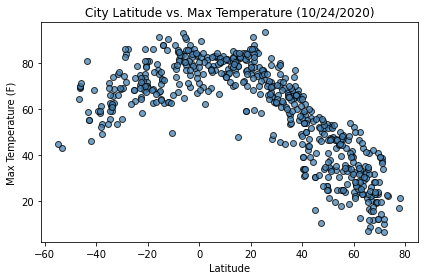

In [25]:

# Set the x and y axis values
x_values = city_weather_df["Lat"]
y_values = city_weather_df["Max Temp"]


# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values, facecolors = "steelblue", alpha = .75, edgecolors = "black")

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%m/%d/%Y')})")

plt.tight_layout()

plt.savefig("output_data/lat_temp_scatter.png")
plt.show()

## Latitude vs. Humidity Plot

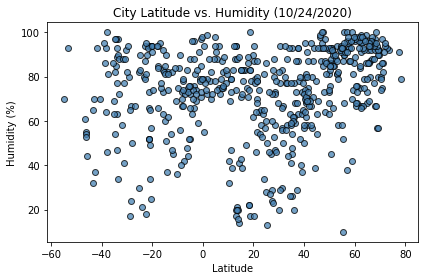

In [28]:
# Set the x and y axis values
x_values = city_weather_df["Lat"]
y_values = city_weather_df["Humidity"]


# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values, facecolors = "steelblue", alpha = .75, edgecolors = "black")

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({time.strftime('%m/%d/%Y')})")

plt.tight_layout()

plt.savefig("output_data/lat_humidity_scatter.png")
plt.show()

## Latitude vs. Cloudiness Plot

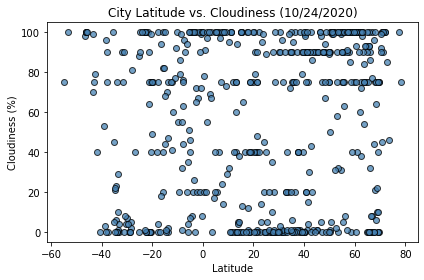

In [27]:
# Set the x and y axis values
x_values = city_weather_df["Lat"]
y_values = city_weather_df["Cloudiness"]


# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values, facecolors = "steelblue", alpha = .75, edgecolors = "black")

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%m/%d/%Y')})")

plt.tight_layout()

plt.savefig("output_data/lat_cloud_scatter.png")
plt.show()

## Latitude vs. Wind Speed Plot

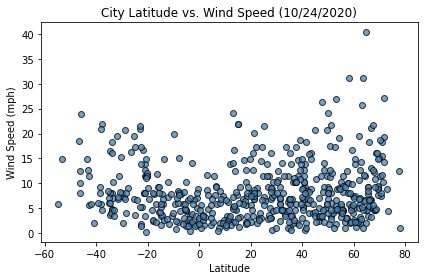

In [26]:
# Set the x and y axis values
x_values = city_weather_df["Lat"]
y_values = city_weather_df["Wind Speed"]


# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values, facecolors = "steelblue", alpha = .75, edgecolors = "black")

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%m/%d/%Y')})")

plt.tight_layout()

plt.savefig("output_data/lat_wind_scatter.png")
plt.show()

## Linear Regression

In [30]:
northern_df = city_weather_df.loc[city_weather_df["Lat"] > 0]
southern_df = city_weather_df.loc[city_weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

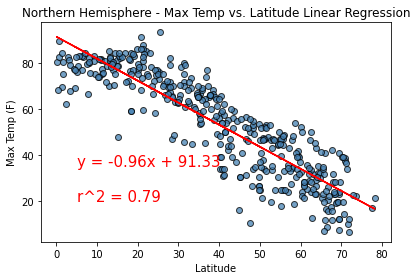

In [86]:
# Set the x and y axis values
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

# Determine the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Determine the line equation and r squared value
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = f"r^2 = {round(rvalue ** 2,2)}"

# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values, facecolors = "steelblue", alpha = .75, edgecolors = "black")
plt.plot(x_values,regress_values,"r-")

# Display the linear regression equation and r squared
plt.annotate(line_eq,(5,35),fontsize=15,color="red")
plt.annotate(r_squared, (5,20),fontsize=15,color="red")

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.tight_layout()

plt.savefig("output_data/northern_lat_max.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

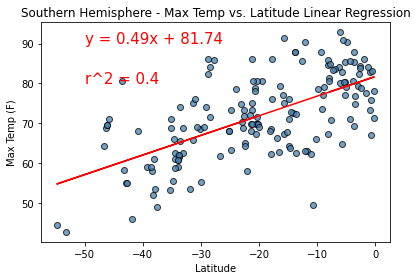

In [87]:
# Set the x and y axis values
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

# Determine the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Determine the line equation and r squared value
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = f"r^2 = {round(rvalue ** 2,2)}"

# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values, facecolors = "steelblue", alpha = .75, edgecolors = "black")
plt.plot(x_values,regress_values,"r-")

# Display the linear regression equation and r squared
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.annotate(r_squared, (-50,80),fontsize=15,color="red")

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.tight_layout()

plt.savefig("output_data/southern_lat_max.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

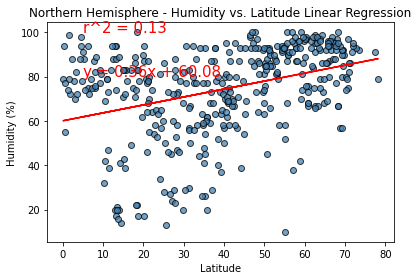

In [89]:
# Set the x and y axis values
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

# Determine the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Determine the line equation and r squared value
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = f"r^2 = {round(rvalue ** 2,2)}"

# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values, facecolors = "steelblue", alpha = .75, edgecolors = "black")
plt.plot(x_values,regress_values,"r-")

# Display the linear regression equation and r squared
plt.annotate(line_eq,(5,80),fontsize=15,color="red")
plt.annotate(r_squared, (5,100),fontsize=15,color="red")

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

plt.tight_layout()

plt.savefig("output_data/northern_humiditylat_max.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

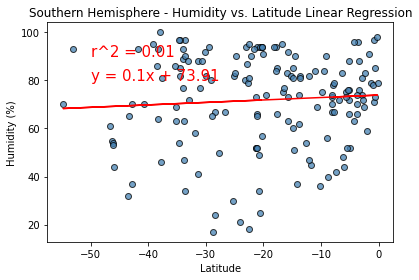

In [90]:
# Set the x and y axis values
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

# Determine the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Determine the line equation and r squared value
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = f"r^2 = {round(rvalue ** 2,2)}"

# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values, facecolors = "steelblue", alpha = .75, edgecolors = "black")
plt.plot(x_values,regress_values,"r-")

# Display the linear regression equation and r squared
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.annotate(r_squared, (-50,90),fontsize=15,color="red")

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

plt.tight_layout()

plt.savefig("output_data/Southern_humiditylat_max.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

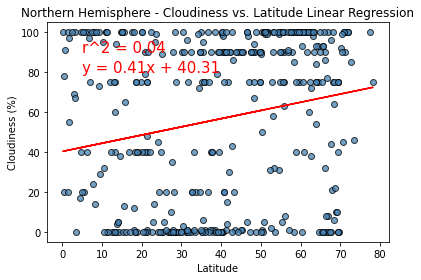

In [91]:
# Set the x and y axis values
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

# Determine the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Determine the line equation and r squared value
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = f"r^2 = {round(rvalue ** 2,2)}"

# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values, facecolors = "steelblue", alpha = .75, edgecolors = "black")
plt.plot(x_values,regress_values,"r-")

# Display the linear regression equation and r squared
plt.annotate(line_eq,(5,80),fontsize=15,color="red")
plt.annotate(r_squared, (5,90),fontsize=15,color="red")

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

plt.tight_layout()

plt.savefig("output_data/northern_cloudinesslat_max.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

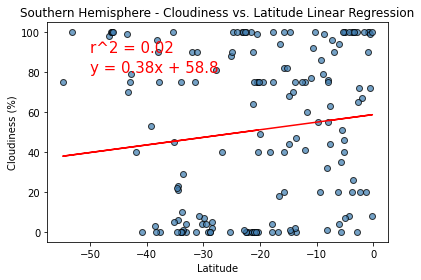

In [92]:
# Set the x and y axis values
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

# Determine the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Determine the line equation and r squared value
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = f"r^2 = {round(rvalue ** 2,2)}"

# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values, facecolors = "steelblue", alpha = .75, edgecolors = "black")
plt.plot(x_values,regress_values,"r-")

# Display the linear regression equation and r squared
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.annotate(r_squared, (-50,90),fontsize=15,color="red")

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

plt.tight_layout()

plt.savefig("output_data/Southern_cloudinesslat_max.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

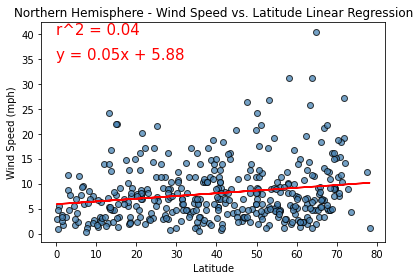

In [93]:
# Set the x and y axis values
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]

# Determine the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Determine the line equation and r squared value
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = f"r^2 = {round(rvalue ** 2,2)}"

# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values, facecolors = "steelblue", alpha = .75, edgecolors = "black")
plt.plot(x_values,regress_values,"r-")

# Display the linear regression equation and r squared
plt.annotate(line_eq,(0,35),fontsize=15,color="red")
plt.annotate(r_squared, (0,40),fontsize=15,color="red")

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

plt.tight_layout()

plt.savefig("output_data/northern_windspeedlat_max.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

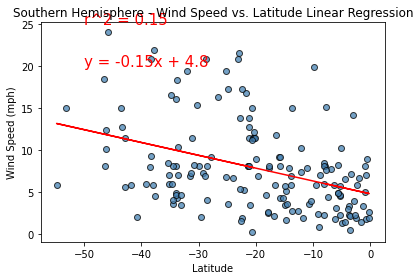

In [96]:
# Set the x and y axis values
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

# Determine the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Determine the line equation and r squared value
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = f"r^2 = {round(rvalue ** 2,2)}"

# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values, facecolors = "steelblue", alpha = .75, edgecolors = "black")
plt.plot(x_values,regress_values,"r-")

# Display the linear regression equation and r squared
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.annotate(r_squared, (-50,25),fontsize=15,color="red")

# Set the x and y labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

plt.tight_layout()

plt.savefig("output_data/southern_windspeedlat_max.png")
plt.show()